In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from tqdm import trange
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [2]:
from model.model import UNet, Conv1x1, GaussNet, ProbUNet
import visualization_utils
import training

In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_root = "/home/glazkova/ProbabilisticUnet/data"

In [5]:
id_to_train_id = training.get_id_to_train_id()

In [6]:
num_classes = 19
batch_size = 2

img_transform_func = transforms.Compose([
                    transforms.Resize((256, 512), interpolation = PIL.Image.BILINEAR),
                    transforms.ToTensor(),
                    
                ])

labels_transform_func = transforms.Compose([
                    transforms.Resize((256, 512), interpolation = PIL.Image.NEAREST),
                    transforms.Lambda(lambda x: id_to_train_id[x]),
                    transforms.ToTensor(),
                    #transforms.Lambda(lambda x: x*255) #better way?
                    
                ])

train_dataset = datasets.Cityscapes(root=data_root, 
                           mode="fine",
                           split="train",
                           target_type="semantic",
                           transform = img_transform_func,
                           target_transform = labels_transform_func)

test_dataset = datasets.Cityscapes(root=data_root, 
                           mode="fine",
                           split="test",
                           target_type="semantic",
                           transform = img_transform_func,
                           target_transform = labels_transform_func)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size)

In [7]:
train_dataset

Dataset Cityscapes
    Number of datapoints: 2975
    Split: train
    Mode: gtFine
    Type: ['semantic']
    Root Location: /home/glazkova/ProbabilisticUnet/data
    Transforms (if any): Compose(
                             Resize(size=(256, 512), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): Compose(
                                    Resize(size=(256, 512), interpolation=PIL.Image.NEAREST)
                                    Lambda()
                                    ToTensor()
                                )

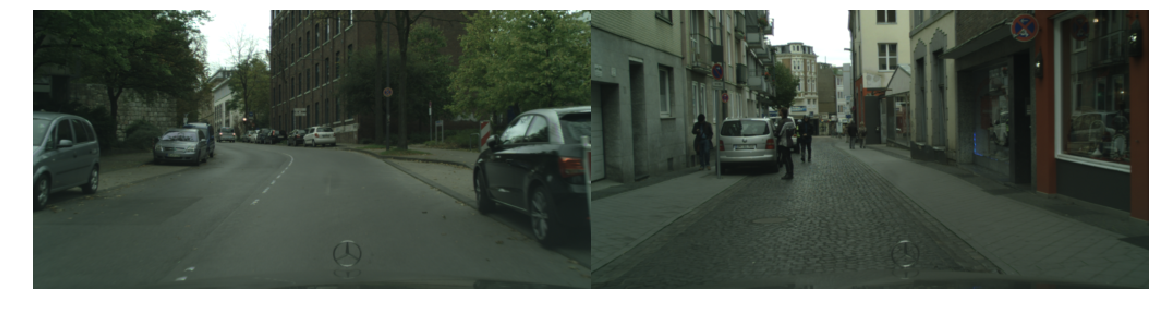

In [8]:
visualization_utils.show_dataset_random_examples(train_dataset, 2)

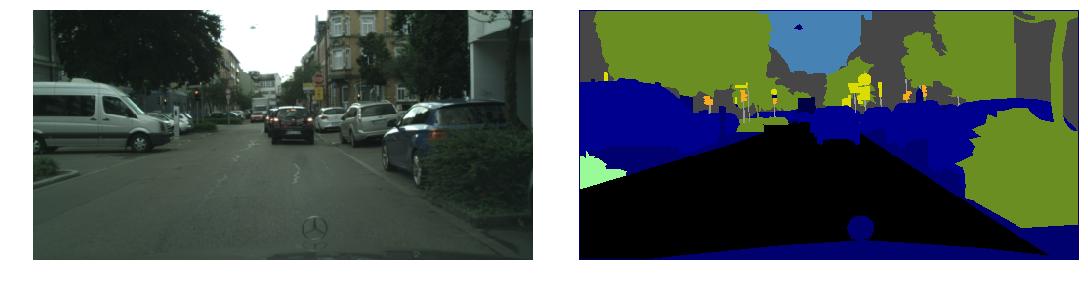

In [9]:
visualization_utils.show_item(train_dataset, 345)

In [10]:
model = ProbUNet(19, 6)
model.to(device)

ProbUNet(
  (unet): UNet(
    (input_block): conv_unit(
      (conv_net): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU()
      )
    )
    (output_block): conv_unit(
      (conv_net): Sequential(
        (0): Conv2d(32, 19, kernel_size=(1, 1), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(19, 19, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
      )
    )
  )
  (prior): GaussNet(
    (last_conv): Sequential(
      (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 12, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (posterior): GaussNet(
    (last_conv): Sequential(
      (0): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 12, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (combine_layer): Conv1x1(
    (conv): Sequenti

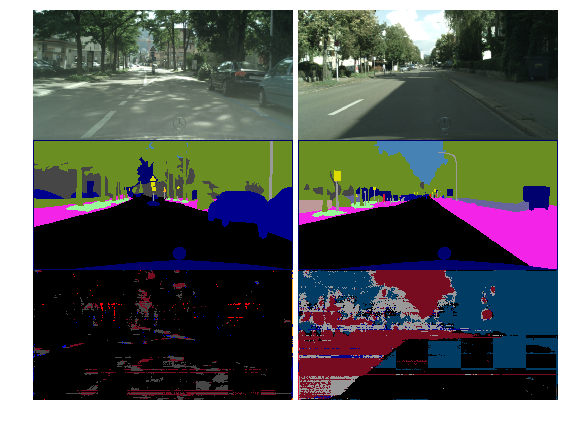

In [11]:
for item in train_loader:
    model.eval()
    model_res = torch.argmax(model.sample(item[0].to(device)), dim = 1)
    visualization_utils.plot_batch_with_results(item[0], item[1].view(batch_size, -1, 1, 256, 512), model_res.view(batch_size, -1, 1, 256, 512))
    break

KeyboardInterrupt: 

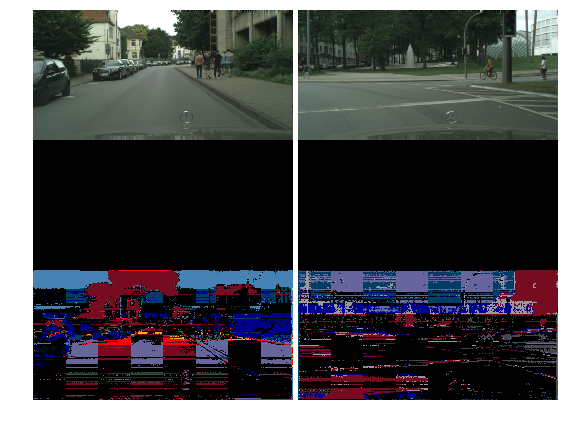

In [20]:
training.test(model, 0, test_loader, res_dir = "results/")

In [140]:
iter_num = 240000
n_epochs = iter_num // (len(train_dataset) // batch_size)

In [141]:
n_epochs

646

In [ ]:
%%time

model = ProbUNet(21, 6)
model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.0001)
train(model, opt, n_epochs)

  0%|          | 0/372 [00:00<?, ?it/s]

tensor(3.5288, device='cuda:0', grad_fn=<AddBackward0>)


  0%|          | 1/372 [00:03<21:10,  3.42s/it]

tensor(3.5202, device='cuda:0', grad_fn=<AddBackward0>)


  1%|          | 2/372 [00:06<21:02,  3.41s/it]

tensor(3.5142, device='cuda:0', grad_fn=<AddBackward0>)


  1%|          | 3/372 [00:10<20:57,  3.41s/it]

tensor(3.5093, device='cuda:0', grad_fn=<AddBackward0>)


  1%|          | 4/372 [00:13<20:55,  3.41s/it]

tensor(3.5051, device='cuda:0', grad_fn=<AddBackward0>)


  1%|▏         | 5/372 [00:17<20:49,  3.40s/it]

tensor(3.5014, device='cuda:0', grad_fn=<AddBackward0>)


  2%|▏         | 6/372 [00:20<20:40,  3.39s/it]

tensor(3.4979, device='cuda:0', grad_fn=<AddBackward0>)


  2%|▏         | 7/372 [00:23<20:35,  3.39s/it]

tensor(3.4948, device='cuda:0', grad_fn=<AddBackward0>)


  2%|▏         | 8/372 [00:27<20:35,  3.39s/it]

tensor(3.4919, device='cuda:0', grad_fn=<AddBackward0>)


  2%|▏         | 9/372 [00:30<20:29,  3.39s/it]

tensor(3.4891, device='cuda:0', grad_fn=<AddBackward0>)


  3%|▎         | 10/372 [00:33<20:24,  3.38s/it]

tensor(3.4865, device='cuda:0', grad_fn=<AddBackward0>)


  3%|▎         | 11/372 [00:37<20:18,  3.37s/it]

tensor(3.4841, device='cuda:0', grad_fn=<AddBackward0>)


  3%|▎         | 12/372 [00:40<20:16,  3.38s/it]

tensor(3.4817, device='cuda:0', grad_fn=<AddBackward0>)


  3%|▎         | 13/372 [00:44<20:14,  3.38s/it]

tensor(3.4794, device='cuda:0', grad_fn=<AddBackward0>)


  4%|▍         | 14/372 [00:47<20:11,  3.38s/it]

tensor(3.4773, device='cuda:0', grad_fn=<AddBackward0>)


  4%|▍         | 15/372 [00:50<20:08,  3.38s/it]

tensor(3.4751, device='cuda:0', grad_fn=<AddBackward0>)


  4%|▍         | 16/372 [00:54<20:05,  3.39s/it]

tensor(3.4730, device='cuda:0', grad_fn=<AddBackward0>)


  5%|▍         | 17/372 [00:57<20:00,  3.38s/it]

tensor(3.4711, device='cuda:0', grad_fn=<AddBackward0>)


  5%|▍         | 18/372 [01:00<19:56,  3.38s/it]

tensor(3.4692, device='cuda:0', grad_fn=<AddBackward0>)


  5%|▌         | 19/372 [01:04<19:53,  3.38s/it]

tensor(3.4673, device='cuda:0', grad_fn=<AddBackward0>)


  5%|▌         | 20/372 [01:07<19:53,  3.39s/it]

tensor(3.4655, device='cuda:0', grad_fn=<AddBackward0>)


  6%|▌         | 21/372 [01:11<19:49,  3.39s/it]

tensor(3.4638, device='cuda:0', grad_fn=<AddBackward0>)


  6%|▌         | 22/372 [01:14<19:45,  3.39s/it]

tensor(3.4620, device='cuda:0', grad_fn=<AddBackward0>)


  6%|▌         | 23/372 [01:17<19:42,  3.39s/it]

tensor(3.4603, device='cuda:0', grad_fn=<AddBackward0>)


  6%|▋         | 24/372 [01:21<19:35,  3.38s/it]

tensor(3.4587, device='cuda:0', grad_fn=<AddBackward0>)


  7%|▋         | 25/372 [01:24<19:31,  3.38s/it]

tensor(3.4571, device='cuda:0', grad_fn=<AddBackward0>)


  7%|▋         | 26/372 [01:28<19:29,  3.38s/it]

tensor(3.4555, device='cuda:0', grad_fn=<AddBackward0>)


  7%|▋         | 27/372 [01:31<19:25,  3.38s/it]

tensor(3.4539, device='cuda:0', grad_fn=<AddBackward0>)


  8%|▊         | 28/372 [01:34<19:19,  3.37s/it]

tensor(3.4524, device='cuda:0', grad_fn=<AddBackward0>)


  8%|▊         | 29/372 [01:38<19:17,  3.37s/it]

tensor(3.4509, device='cuda:0', grad_fn=<AddBackward0>)


  8%|▊         | 30/372 [01:41<19:14,  3.38s/it]

tensor(3.4495, device='cuda:0', grad_fn=<AddBackward0>)


  8%|▊         | 31/372 [01:44<19:14,  3.39s/it]

tensor(3.4480, device='cuda:0', grad_fn=<AddBackward0>)


  9%|▊         | 32/372 [01:48<19:12,  3.39s/it]

tensor(3.4466, device='cuda:0', grad_fn=<AddBackward0>)


  9%|▉         | 33/372 [01:51<19:08,  3.39s/it]

tensor(3.4452, device='cuda:0', grad_fn=<AddBackward0>)


  9%|▉         | 34/372 [01:55<19:05,  3.39s/it]

tensor(3.4438, device='cuda:0', grad_fn=<AddBackward0>)


  9%|▉         | 35/372 [01:58<19:02,  3.39s/it]

tensor(3.4425, device='cuda:0', grad_fn=<AddBackward0>)


 10%|▉         | 36/372 [02:01<18:56,  3.38s/it]

tensor(3.4411, device='cuda:0', grad_fn=<AddBackward0>)


 10%|▉         | 37/372 [02:05<18:53,  3.38s/it]

tensor(3.4398, device='cuda:0', grad_fn=<AddBackward0>)


 10%|█         | 38/372 [02:08<18:50,  3.38s/it]

tensor(3.4385, device='cuda:0', grad_fn=<AddBackward0>)


 10%|█         | 39/372 [02:12<18:47,  3.39s/it]

tensor(3.4372, device='cuda:0', grad_fn=<AddBackward0>)


 11%|█         | 40/372 [02:15<18:46,  3.39s/it]

tensor(3.4360, device='cuda:0', grad_fn=<AddBackward0>)


 11%|█         | 41/372 [02:18<18:43,  3.39s/it]

tensor(3.4348, device='cuda:0', grad_fn=<AddBackward0>)


 11%|█▏        | 42/372 [02:22<18:38,  3.39s/it]

tensor(3.4335, device='cuda:0', grad_fn=<AddBackward0>)


 12%|█▏        | 43/372 [02:25<18:36,  3.39s/it]

tensor(3.4323, device='cuda:0', grad_fn=<AddBackward0>)


 12%|█▏        | 44/372 [02:29<18:34,  3.40s/it]

tensor(3.4310, device='cuda:0', grad_fn=<AddBackward0>)


 12%|█▏        | 45/372 [02:32<18:31,  3.40s/it]

tensor(3.4299, device='cuda:0', grad_fn=<AddBackward0>)


 12%|█▏        | 46/372 [02:35<18:25,  3.39s/it]

tensor(3.4287, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 47/372 [02:39<18:22,  3.39s/it]

tensor(3.4275, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 48/372 [02:42<18:16,  3.38s/it]

tensor(3.4264, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 49/372 [02:45<18:11,  3.38s/it]

tensor(3.4252, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 50/372 [02:49<18:07,  3.38s/it]

tensor(3.4241, device='cuda:0', grad_fn=<AddBackward0>)


 14%|█▎        | 51/372 [02:52<18:05,  3.38s/it]

tensor(3.4229, device='cuda:0', grad_fn=<AddBackward0>)


 14%|█▍        | 52/372 [02:56<18:02,  3.38s/it]

tensor(3.4218, device='cuda:0', grad_fn=<AddBackward0>)


 14%|█▍        | 53/372 [02:59<17:59,  3.38s/it]

tensor(3.4207, device='cuda:0', grad_fn=<AddBackward0>)


 15%|█▍        | 54/372 [03:02<17:57,  3.39s/it]

tensor(3.4197, device='cuda:0', grad_fn=<AddBackward0>)


 15%|█▍        | 55/372 [03:06<17:53,  3.39s/it]

tensor(3.4186, device='cuda:0', grad_fn=<AddBackward0>)


 15%|█▌        | 56/372 [03:09<17:46,  3.38s/it]

tensor(3.4175, device='cuda:0', grad_fn=<AddBackward0>)


 15%|█▌        | 57/372 [03:12<17:45,  3.38s/it]

tensor(3.4165, device='cuda:0', grad_fn=<AddBackward0>)


 16%|█▌        | 58/372 [03:16<17:44,  3.39s/it]

tensor(3.4154, device='cuda:0', grad_fn=<AddBackward0>)


 16%|█▌        | 59/372 [03:19<17:39,  3.38s/it]

tensor(3.4143, device='cuda:0', grad_fn=<AddBackward0>)


 16%|█▌        | 60/372 [03:23<17:34,  3.38s/it]

tensor(3.4133, device='cuda:0', grad_fn=<AddBackward0>)


 16%|█▋        | 61/372 [03:26<17:32,  3.38s/it]

tensor(3.4123, device='cuda:0', grad_fn=<AddBackward0>)


 17%|█▋        | 62/372 [03:29<17:29,  3.39s/it]

tensor(3.4112, device='cuda:0', grad_fn=<AddBackward0>)


 17%|█▋        | 63/372 [03:33<17:28,  3.39s/it]

tensor(3.4103, device='cuda:0', grad_fn=<AddBackward0>)


 17%|█▋        | 64/372 [03:36<17:23,  3.39s/it]

tensor(3.4092, device='cuda:0', grad_fn=<AddBackward0>)


 17%|█▋        | 65/372 [03:40<17:21,  3.39s/it]

tensor(3.4082, device='cuda:0', grad_fn=<AddBackward0>)


 18%|█▊        | 66/372 [03:43<17:18,  3.39s/it]

tensor(3.4073, device='cuda:0', grad_fn=<AddBackward0>)


 18%|█▊        | 67/372 [03:46<17:12,  3.38s/it]

tensor(3.4062, device='cuda:0', grad_fn=<AddBackward0>)


 18%|█▊        | 68/372 [03:50<17:08,  3.38s/it]

tensor(3.4053, device='cuda:0', grad_fn=<AddBackward0>)


 19%|█▊        | 69/372 [03:53<17:05,  3.39s/it]

tensor(3.4043, device='cuda:0', grad_fn=<AddBackward0>)


 19%|█▉        | 70/372 [03:57<17:03,  3.39s/it]

tensor(3.4033, device='cuda:0', grad_fn=<AddBackward0>)


 19%|█▉        | 71/372 [04:00<17:01,  3.39s/it]

tensor(3.4024, device='cuda:0', grad_fn=<AddBackward0>)


 19%|█▉        | 72/372 [04:03<17:00,  3.40s/it]

tensor(3.4015, device='cuda:0', grad_fn=<AddBackward0>)


 20%|█▉        | 73/372 [04:07<16:55,  3.40s/it]

tensor(3.4005, device='cuda:0', grad_fn=<AddBackward0>)


 20%|█▉        | 74/372 [04:10<16:50,  3.39s/it]

tensor(3.3996, device='cuda:0', grad_fn=<AddBackward0>)


 20%|██        | 75/372 [04:14<16:50,  3.40s/it]

tensor(3.3986, device='cuda:0', grad_fn=<AddBackward0>)


 20%|██        | 76/372 [04:17<16:44,  3.39s/it]

tensor(3.3977, device='cuda:0', grad_fn=<AddBackward0>)


 21%|██        | 77/372 [04:20<16:37,  3.38s/it]

tensor(3.3968, device='cuda:0', grad_fn=<AddBackward0>)


 21%|██        | 78/372 [04:24<16:33,  3.38s/it]

tensor(3.3959, device='cuda:0', grad_fn=<AddBackward0>)


 21%|██        | 79/372 [04:27<16:32,  3.39s/it]

tensor(3.3949, device='cuda:0', grad_fn=<AddBackward0>)


 22%|██▏       | 80/372 [04:30<16:31,  3.40s/it]

tensor(3.3941, device='cuda:0', grad_fn=<AddBackward0>)


 22%|██▏       | 81/372 [04:34<16:28,  3.40s/it]

tensor(3.3932, device='cuda:0', grad_fn=<AddBackward0>)


 22%|██▏       | 82/372 [04:37<16:26,  3.40s/it]

tensor(3.3923, device='cuda:0', grad_fn=<AddBackward0>)


 22%|██▏       | 83/372 [04:41<16:23,  3.40s/it]

tensor(3.3914, device='cuda:0', grad_fn=<AddBackward0>)


 23%|██▎       | 84/372 [04:44<16:20,  3.40s/it]

tensor(3.3905, device='cuda:0', grad_fn=<AddBackward0>)


 23%|██▎       | 85/372 [04:48<16:17,  3.41s/it]

tensor(3.3896, device='cuda:0', grad_fn=<AddBackward0>)


 23%|██▎       | 86/372 [04:51<16:13,  3.40s/it]

tensor(3.3887, device='cuda:0', grad_fn=<AddBackward0>)


 23%|██▎       | 87/372 [04:54<16:10,  3.41s/it]

tensor(3.3878, device='cuda:0', grad_fn=<AddBackward0>)


 24%|██▎       | 88/372 [04:58<16:06,  3.40s/it]

tensor(3.3871, device='cuda:0', grad_fn=<AddBackward0>)


 24%|██▍       | 89/372 [05:01<16:02,  3.40s/it]

tensor(3.3863, device='cuda:0', grad_fn=<AddBackward0>)


 24%|██▍       | 90/372 [05:05<15:58,  3.40s/it]

tensor(3.3854, device='cuda:0', grad_fn=<AddBackward0>)


 24%|██▍       | 91/372 [05:08<15:51,  3.39s/it]

tensor(3.3846, device='cuda:0', grad_fn=<AddBackward0>)


 25%|██▍       | 92/372 [05:11<15:46,  3.38s/it]

tensor(3.3837, device='cuda:0', grad_fn=<AddBackward0>)


 25%|██▌       | 93/372 [05:15<15:44,  3.38s/it]

tensor(3.3829, device='cuda:0', grad_fn=<AddBackward0>)


 25%|██▌       | 94/372 [05:18<15:39,  3.38s/it]

tensor(3.3820, device='cuda:0', grad_fn=<AddBackward0>)


 26%|██▌       | 95/372 [05:21<15:33,  3.37s/it]

tensor(3.3812, device='cuda:0', grad_fn=<AddBackward0>)


 26%|██▌       | 96/372 [05:25<15:29,  3.37s/it]

tensor(3.3804, device='cuda:0', grad_fn=<AddBackward0>)


 26%|██▌       | 97/372 [05:28<15:24,  3.36s/it]

tensor(3.3796, device='cuda:0', grad_fn=<AddBackward0>)


 26%|██▋       | 98/372 [05:31<15:20,  3.36s/it]

tensor(3.3787, device='cuda:0', grad_fn=<AddBackward0>)


 27%|██▋       | 99/372 [05:35<15:18,  3.36s/it]

tensor(3.3779, device='cuda:0', grad_fn=<AddBackward0>)


 27%|██▋       | 100/372 [05:38<15:15,  3.37s/it]

tensor(3.3771, device='cuda:0', grad_fn=<AddBackward0>)


 27%|██▋       | 101/372 [05:42<15:12,  3.37s/it]

tensor(3.3763, device='cuda:0', grad_fn=<AddBackward0>)


 27%|██▋       | 102/372 [05:45<15:10,  3.37s/it]

tensor(3.3755, device='cuda:0', grad_fn=<AddBackward0>)


 28%|██▊       | 103/372 [05:48<15:06,  3.37s/it]

tensor(3.3747, device='cuda:0', grad_fn=<AddBackward0>)


 28%|██▊       | 104/372 [05:52<15:02,  3.37s/it]

tensor(3.3739, device='cuda:0', grad_fn=<AddBackward0>)


 28%|██▊       | 105/372 [05:55<14:58,  3.37s/it]

tensor(3.3731, device='cuda:0', grad_fn=<AddBackward0>)


 28%|██▊       | 106/372 [05:58<14:53,  3.36s/it]

tensor(3.3722, device='cuda:0', grad_fn=<AddBackward0>)


 29%|██▉       | 107/372 [06:02<14:52,  3.37s/it]

tensor(3.3715, device='cuda:0', grad_fn=<AddBackward0>)


 29%|██▉       | 108/372 [06:05<14:48,  3.37s/it]

tensor(3.3707, device='cuda:0', grad_fn=<AddBackward0>)


 29%|██▉       | 109/372 [06:08<14:46,  3.37s/it]

tensor(3.3699, device='cuda:0', grad_fn=<AddBackward0>)


 30%|██▉       | 110/372 [06:12<14:44,  3.37s/it]

tensor(3.3690, device='cuda:0', grad_fn=<AddBackward0>)


 30%|██▉       | 111/372 [06:15<14:43,  3.39s/it]

tensor(3.3682, device='cuda:0', grad_fn=<AddBackward0>)


 30%|███       | 112/372 [06:19<14:39,  3.38s/it]

tensor(3.3674, device='cuda:0', grad_fn=<AddBackward0>)


 30%|███       | 113/372 [06:22<14:36,  3.38s/it]

tensor(3.3666, device='cuda:0', grad_fn=<AddBackward0>)


 31%|███       | 114/372 [06:25<14:32,  3.38s/it]

tensor(3.3659, device='cuda:0', grad_fn=<AddBackward0>)


 31%|███       | 115/372 [06:29<14:31,  3.39s/it]

tensor(3.3652, device='cuda:0', grad_fn=<AddBackward0>)


 31%|███       | 116/372 [06:33<15:09,  3.55s/it]

tensor(3.3644, device='cuda:0', grad_fn=<AddBackward0>)


 31%|███▏      | 117/372 [06:37<15:28,  3.64s/it]

tensor(3.3636, device='cuda:0', grad_fn=<AddBackward0>)


 32%|███▏      | 118/372 [06:40<15:39,  3.70s/it]

tensor(3.3628, device='cuda:0', grad_fn=<AddBackward0>)


 32%|███▏      | 119/372 [06:44<15:50,  3.76s/it]

tensor(3.3621, device='cuda:0', grad_fn=<AddBackward0>)


 32%|███▏      | 120/372 [06:48<15:53,  3.78s/it]

tensor(3.3613, device='cuda:0', grad_fn=<AddBackward0>)


 33%|███▎      | 121/372 [06:52<15:54,  3.80s/it]

tensor(3.3606, device='cuda:0', grad_fn=<AddBackward0>)


 33%|███▎      | 122/372 [06:56<15:56,  3.83s/it]

tensor(3.3598, device='cuda:0', grad_fn=<AddBackward0>)


 33%|███▎      | 123/372 [07:00<15:56,  3.84s/it]

tensor(3.3590, device='cuda:0', grad_fn=<AddBackward0>)


 33%|███▎      | 124/372 [07:04<15:52,  3.84s/it]

tensor(3.3582, device='cuda:0', grad_fn=<AddBackward0>)


 34%|███▎      | 125/372 [07:08<15:59,  3.89s/it]

tensor(3.3575, device='cuda:0', grad_fn=<AddBackward0>)


 34%|███▍      | 126/372 [07:12<16:01,  3.91s/it]

tensor(3.3568, device='cuda:0', grad_fn=<AddBackward0>)


 34%|███▍      | 127/372 [07:15<15:59,  3.92s/it]

tensor(3.3560, device='cuda:0', grad_fn=<AddBackward0>)


 34%|███▍      | 128/372 [07:19<15:57,  3.92s/it]

tensor(3.3553, device='cuda:0', grad_fn=<AddBackward0>)


 35%|███▍      | 129/372 [07:23<15:55,  3.93s/it]

tensor(3.3546, device='cuda:0', grad_fn=<AddBackward0>)


 35%|███▍      | 130/372 [07:27<15:56,  3.95s/it]

tensor(3.3539, device='cuda:0', grad_fn=<AddBackward0>)


 35%|███▌      | 131/372 [07:31<15:53,  3.96s/it]

tensor(3.3532, device='cuda:0', grad_fn=<AddBackward0>)


 35%|███▌      | 132/372 [07:35<15:49,  3.96s/it]

tensor(3.3524, device='cuda:0', grad_fn=<AddBackward0>)


 36%|███▌      | 133/372 [07:39<15:42,  3.94s/it]

tensor(3.3517, device='cuda:0', grad_fn=<AddBackward0>)


 36%|███▌      | 134/372 [07:43<15:34,  3.93s/it]

tensor(3.3510, device='cuda:0', grad_fn=<AddBackward0>)


 36%|███▋      | 135/372 [07:47<15:30,  3.93s/it]

tensor(3.3503, device='cuda:0', grad_fn=<AddBackward0>)


 37%|███▋      | 136/372 [07:51<15:29,  3.94s/it]

tensor(3.3496, device='cuda:0', grad_fn=<AddBackward0>)


 37%|███▋      | 137/372 [07:55<15:28,  3.95s/it]

tensor(3.3488, device='cuda:0', grad_fn=<AddBackward0>)


 37%|███▋      | 138/372 [07:59<15:28,  3.97s/it]

tensor(3.3481, device='cuda:0', grad_fn=<AddBackward0>)


 37%|███▋      | 139/372 [08:03<15:22,  3.96s/it]

tensor(3.3474, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 140/372 [08:07<15:13,  3.94s/it]

tensor(3.3467, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 141/372 [08:11<15:06,  3.92s/it]

tensor(3.3460, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 142/372 [08:15<14:58,  3.91s/it]

tensor(3.3453, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 143/372 [08:18<14:51,  3.89s/it]

tensor(3.3447, device='cuda:0', grad_fn=<AddBackward0>)


 39%|███▊      | 144/372 [08:22<14:46,  3.89s/it]

tensor(3.3439, device='cuda:0', grad_fn=<AddBackward0>)


 39%|███▉      | 145/372 [08:26<14:40,  3.88s/it]

tensor(3.3433, device='cuda:0', grad_fn=<AddBackward0>)


 39%|███▉      | 146/372 [08:30<14:37,  3.88s/it]

tensor(3.3425, device='cuda:0', grad_fn=<AddBackward0>)


 40%|███▉      | 147/372 [08:34<14:32,  3.88s/it]

tensor(3.3418, device='cuda:0', grad_fn=<AddBackward0>)


 40%|███▉      | 148/372 [08:38<14:38,  3.92s/it]

tensor(3.3412, device='cuda:0', grad_fn=<AddBackward0>)


 40%|████      | 149/372 [08:42<14:39,  3.94s/it]

tensor(3.3405, device='cuda:0', grad_fn=<AddBackward0>)


 40%|████      | 150/372 [08:46<14:39,  3.96s/it]

tensor(3.3398, device='cuda:0', grad_fn=<AddBackward0>)


 41%|████      | 151/372 [08:50<14:44,  4.00s/it]

tensor(3.3391, device='cuda:0', grad_fn=<AddBackward0>)


 41%|████      | 152/372 [08:54<14:42,  4.01s/it]

tensor(3.3384, device='cuda:0', grad_fn=<AddBackward0>)


 41%|████      | 153/372 [08:58<14:35,  4.00s/it]

tensor(3.3378, device='cuda:0', grad_fn=<AddBackward0>)


 41%|████▏     | 154/372 [09:02<14:39,  4.04s/it]

tensor(3.3371, device='cuda:0', grad_fn=<AddBackward0>)


 42%|████▏     | 155/372 [09:06<14:39,  4.05s/it]

tensor(3.3364, device='cuda:0', grad_fn=<AddBackward0>)


 42%|████▏     | 156/372 [09:10<14:27,  4.01s/it]

tensor(3.3358, device='cuda:0', grad_fn=<AddBackward0>)


 42%|████▏     | 157/372 [09:14<14:19,  4.00s/it]

tensor(3.3351, device='cuda:0', grad_fn=<AddBackward0>)


 42%|████▏     | 158/372 [09:18<14:12,  3.99s/it]

tensor(3.3344, device='cuda:0', grad_fn=<AddBackward0>)


 43%|████▎     | 159/372 [09:22<14:09,  3.99s/it]

tensor(3.3338, device='cuda:0', grad_fn=<AddBackward0>)


 43%|████▎     | 160/372 [09:26<14:01,  3.97s/it]

tensor(3.3331, device='cuda:0', grad_fn=<AddBackward0>)


 43%|████▎     | 161/372 [09:30<13:58,  3.97s/it]

tensor(3.3325, device='cuda:0', grad_fn=<AddBackward0>)


 44%|████▎     | 162/372 [09:34<13:57,  3.99s/it]

tensor(3.3318, device='cuda:0', grad_fn=<AddBackward0>)


 44%|████▍     | 163/372 [09:38<13:57,  4.01s/it]

tensor(3.3311, device='cuda:0', grad_fn=<AddBackward0>)


 44%|████▍     | 164/372 [09:42<13:51,  4.00s/it]

tensor(3.3304, device='cuda:0', grad_fn=<AddBackward0>)


 44%|████▍     | 165/372 [09:46<13:47,  4.00s/it]

tensor(3.3298, device='cuda:0', grad_fn=<AddBackward0>)


 45%|████▍     | 166/372 [09:50<13:41,  3.99s/it]

tensor(3.3292, device='cuda:0', grad_fn=<AddBackward0>)


 45%|████▍     | 167/372 [09:54<13:37,  3.99s/it]

tensor(3.3285, device='cuda:0', grad_fn=<AddBackward0>)


 45%|████▌     | 168/372 [09:58<13:31,  3.98s/it]

tensor(3.3281, device='cuda:0', grad_fn=<AddBackward0>)


 45%|████▌     | 169/372 [10:02<13:22,  3.95s/it]

tensor(3.3274, device='cuda:0', grad_fn=<AddBackward0>)


 46%|████▌     | 170/372 [10:06<13:11,  3.92s/it]

tensor(3.3268, device='cuda:0', grad_fn=<AddBackward0>)


 46%|████▌     | 171/372 [10:10<13:09,  3.93s/it]

tensor(3.3261, device='cuda:0', grad_fn=<AddBackward0>)


 46%|████▌     | 172/372 [10:14<13:06,  3.93s/it]

tensor(3.3255, device='cuda:0', grad_fn=<AddBackward0>)


 47%|████▋     | 173/372 [10:18<13:06,  3.95s/it]

tensor(3.3248, device='cuda:0', grad_fn=<AddBackward0>)


 47%|████▋     | 174/372 [10:22<13:02,  3.95s/it]

tensor(3.3243, device='cuda:0', grad_fn=<AddBackward0>)


 47%|████▋     | 175/372 [10:25<12:57,  3.95s/it]

tensor(3.3235, device='cuda:0', grad_fn=<AddBackward0>)


 47%|████▋     | 176/372 [10:29<12:55,  3.96s/it]

tensor(3.3229, device='cuda:0', grad_fn=<AddBackward0>)


 48%|████▊     | 177/372 [10:33<12:53,  3.97s/it]

tensor(3.3223, device='cuda:0', grad_fn=<AddBackward0>)


 48%|████▊     | 178/372 [10:37<12:49,  3.97s/it]

tensor(3.3217, device='cuda:0', grad_fn=<AddBackward0>)


 48%|████▊     | 179/372 [10:41<12:45,  3.97s/it]

tensor(3.3210, device='cuda:0', grad_fn=<AddBackward0>)


 48%|████▊     | 180/372 [10:45<12:43,  3.98s/it]

tensor(3.3204, device='cuda:0', grad_fn=<AddBackward0>)


 49%|████▊     | 181/372 [10:49<12:37,  3.96s/it]

tensor(3.3197, device='cuda:0', grad_fn=<AddBackward0>)


 49%|████▉     | 182/372 [10:53<12:37,  3.99s/it]

tensor(3.3189, device='cuda:0', grad_fn=<AddBackward0>)


 49%|████▉     | 183/372 [10:57<12:41,  4.03s/it]

tensor(3.3183, device='cuda:0', grad_fn=<AddBackward0>)


 49%|████▉     | 184/372 [11:02<12:42,  4.06s/it]

tensor(3.3177, device='cuda:0', grad_fn=<AddBackward0>)


 50%|████▉     | 185/372 [11:06<12:45,  4.09s/it]

tensor(3.3171, device='cuda:0', grad_fn=<AddBackward0>)


 50%|█████     | 186/372 [11:10<12:42,  4.10s/it]

tensor(3.3164, device='cuda:0', grad_fn=<AddBackward0>)


 50%|█████     | 187/372 [11:14<12:36,  4.09s/it]

tensor(3.3158, device='cuda:0', grad_fn=<AddBackward0>)


 51%|█████     | 188/372 [11:18<12:26,  4.05s/it]

tensor(3.3152, device='cuda:0', grad_fn=<AddBackward0>)


 51%|█████     | 189/372 [11:22<12:23,  4.06s/it]

tensor(3.3146, device='cuda:0', grad_fn=<AddBackward0>)


 51%|█████     | 190/372 [11:26<12:15,  4.04s/it]

tensor(3.3140, device='cuda:0', grad_fn=<AddBackward0>)


 51%|█████▏    | 191/372 [11:30<12:11,  4.04s/it]

tensor(3.3133, device='cuda:0', grad_fn=<AddBackward0>)


 52%|█████▏    | 192/372 [11:34<12:07,  4.04s/it]

tensor(3.3127, device='cuda:0', grad_fn=<AddBackward0>)


 52%|█████▏    | 193/372 [11:38<12:00,  4.03s/it]

tensor(3.3121, device='cuda:0', grad_fn=<AddBackward0>)


 52%|█████▏    | 194/372 [11:42<11:57,  4.03s/it]

tensor(3.3115, device='cuda:0', grad_fn=<AddBackward0>)


 52%|█████▏    | 195/372 [11:46<11:58,  4.06s/it]

tensor(3.3109, device='cuda:0', grad_fn=<AddBackward0>)


 53%|█████▎    | 196/372 [11:50<11:59,  4.09s/it]

tensor(3.3103, device='cuda:0', grad_fn=<AddBackward0>)


 53%|█████▎    | 197/372 [11:54<11:52,  4.07s/it]

tensor(3.3097, device='cuda:0', grad_fn=<AddBackward0>)


 53%|█████▎    | 198/372 [11:59<11:50,  4.09s/it]

tensor(3.3091, device='cuda:0', grad_fn=<AddBackward0>)


 53%|█████▎    | 199/372 [12:03<11:49,  4.10s/it]

tensor(3.3085, device='cuda:0', grad_fn=<AddBackward0>)


 54%|█████▍    | 200/372 [12:07<11:49,  4.12s/it]

tensor(3.3078, device='cuda:0', grad_fn=<AddBackward0>)


 54%|█████▍    | 201/372 [12:11<11:47,  4.14s/it]

tensor(3.3073, device='cuda:0', grad_fn=<AddBackward0>)


 54%|█████▍    | 202/372 [12:15<11:37,  4.11s/it]

tensor(3.3067, device='cuda:0', grad_fn=<AddBackward0>)


 55%|█████▍    | 203/372 [12:19<11:32,  4.10s/it]

tensor(3.3061, device='cuda:0', grad_fn=<AddBackward0>)


 55%|█████▍    | 204/372 [12:23<11:24,  4.07s/it]

tensor(3.3055, device='cuda:0', grad_fn=<AddBackward0>)


 55%|█████▌    | 205/372 [12:27<11:13,  4.04s/it]

tensor(3.3049, device='cuda:0', grad_fn=<AddBackward0>)


 55%|█████▌    | 206/372 [12:31<11:06,  4.02s/it]

tensor(3.3043, device='cuda:0', grad_fn=<AddBackward0>)


 56%|█████▌    | 207/372 [12:35<11:02,  4.01s/it]

tensor(3.3037, device='cuda:0', grad_fn=<AddBackward0>)


 56%|█████▌    | 208/372 [12:39<11:02,  4.04s/it]

tensor(3.3031, device='cuda:0', grad_fn=<AddBackward0>)


 56%|█████▌    | 209/372 [12:43<10:53,  4.01s/it]

tensor(3.3025, device='cuda:0', grad_fn=<AddBackward0>)


 56%|█████▋    | 210/372 [12:47<10:48,  4.00s/it]

tensor(3.3019, device='cuda:0', grad_fn=<AddBackward0>)


 57%|█████▋    | 211/372 [12:51<10:45,  4.01s/it]

tensor(3.3013, device='cuda:0', grad_fn=<AddBackward0>)


 57%|█████▋    | 212/372 [12:55<10:41,  4.01s/it]

tensor(3.3007, device='cuda:0', grad_fn=<AddBackward0>)


 57%|█████▋    | 213/372 [12:59<10:32,  3.98s/it]

tensor(3.3002, device='cuda:0', grad_fn=<AddBackward0>)


 58%|█████▊    | 214/372 [13:03<10:26,  3.96s/it]

tensor(3.2996, device='cuda:0', grad_fn=<AddBackward0>)


 58%|█████▊    | 215/372 [13:07<10:19,  3.95s/it]

tensor(3.2990, device='cuda:0', grad_fn=<AddBackward0>)


 58%|█████▊    | 216/372 [13:11<10:13,  3.94s/it]

tensor(3.2984, device='cuda:0', grad_fn=<AddBackward0>)


 58%|█████▊    | 217/372 [13:15<10:09,  3.93s/it]

tensor(3.2979, device='cuda:0', grad_fn=<AddBackward0>)


 59%|█████▊    | 218/372 [13:19<10:09,  3.96s/it]

tensor(3.2973, device='cuda:0', grad_fn=<AddBackward0>)


 59%|█████▉    | 219/372 [13:23<10:09,  3.98s/it]

tensor(3.2967, device='cuda:0', grad_fn=<AddBackward0>)


 59%|█████▉    | 220/372 [13:27<10:09,  4.01s/it]

tensor(3.2961, device='cuda:0', grad_fn=<AddBackward0>)


 59%|█████▉    | 221/372 [13:31<10:08,  4.03s/it]

tensor(3.2955, device='cuda:0', grad_fn=<AddBackward0>)


 60%|█████▉    | 222/372 [13:35<10:06,  4.04s/it]

tensor(3.2950, device='cuda:0', grad_fn=<AddBackward0>)


 60%|█████▉    | 223/372 [13:39<09:55,  4.00s/it]

tensor(3.2944, device='cuda:0', grad_fn=<AddBackward0>)


 60%|██████    | 224/372 [13:43<09:46,  3.96s/it]

tensor(3.2939, device='cuda:0', grad_fn=<AddBackward0>)


 60%|██████    | 225/372 [13:47<09:37,  3.93s/it]

tensor(3.2933, device='cuda:0', grad_fn=<AddBackward0>)


 61%|██████    | 226/372 [13:51<09:31,  3.92s/it]

tensor(3.2928, device='cuda:0', grad_fn=<AddBackward0>)


 61%|██████    | 227/372 [13:54<09:27,  3.91s/it]

tensor(3.2922, device='cuda:0', grad_fn=<AddBackward0>)


 61%|██████▏   | 228/372 [13:58<09:21,  3.90s/it]

tensor(3.2916, device='cuda:0', grad_fn=<AddBackward0>)


 62%|██████▏   | 229/372 [14:02<09:17,  3.90s/it]

tensor(3.2910, device='cuda:0', grad_fn=<AddBackward0>)


 62%|██████▏   | 230/372 [14:06<09:15,  3.91s/it]

tensor(3.2905, device='cuda:0', grad_fn=<AddBackward0>)


 62%|██████▏   | 231/372 [14:10<09:09,  3.90s/it]

tensor(3.2899, device='cuda:0', grad_fn=<AddBackward0>)


 62%|██████▏   | 232/372 [14:14<09:04,  3.89s/it]

tensor(3.2894, device='cuda:0', grad_fn=<AddBackward0>)


 63%|██████▎   | 233/372 [14:18<08:59,  3.88s/it]

tensor(3.2888, device='cuda:0', grad_fn=<AddBackward0>)


 63%|██████▎   | 234/372 [14:22<08:57,  3.90s/it]

tensor(3.2883, device='cuda:0', grad_fn=<AddBackward0>)


 63%|██████▎   | 235/372 [14:26<08:51,  3.88s/it]

tensor(3.2877, device='cuda:0', grad_fn=<AddBackward0>)
